# Visualisations for "Close"data 

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import zscore
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

https://finance.yahoo.com/quote/BTC-USD/history

In [2]:
df= pd.read_csv("BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3465,2024-03-13,71482.117188,73637.476563,71334.093750,73083.500000,73083.500000,48212536929
3466,2024-03-14,73079.375000,73750.070313,68563.023438,71396.593750,71396.593750,59594605698
3467,2024-03-15,71387.875000,72357.132813,65630.695313,69403.773438,69403.773438,78320453976
3468,2024-03-16,69392.484375,70046.273438,64801.394531,65315.117188,65315.117188,46842198371


## Visualizations for 'Close' column

In [3]:
data_close = df[['Date','Close']]
data_close

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3465,2024-03-13,73083.500000
3466,2024-03-14,71396.593750
3467,2024-03-15,69403.773438
3468,2024-03-16,65315.117188


In [4]:
data_close.index = data_close['Date']

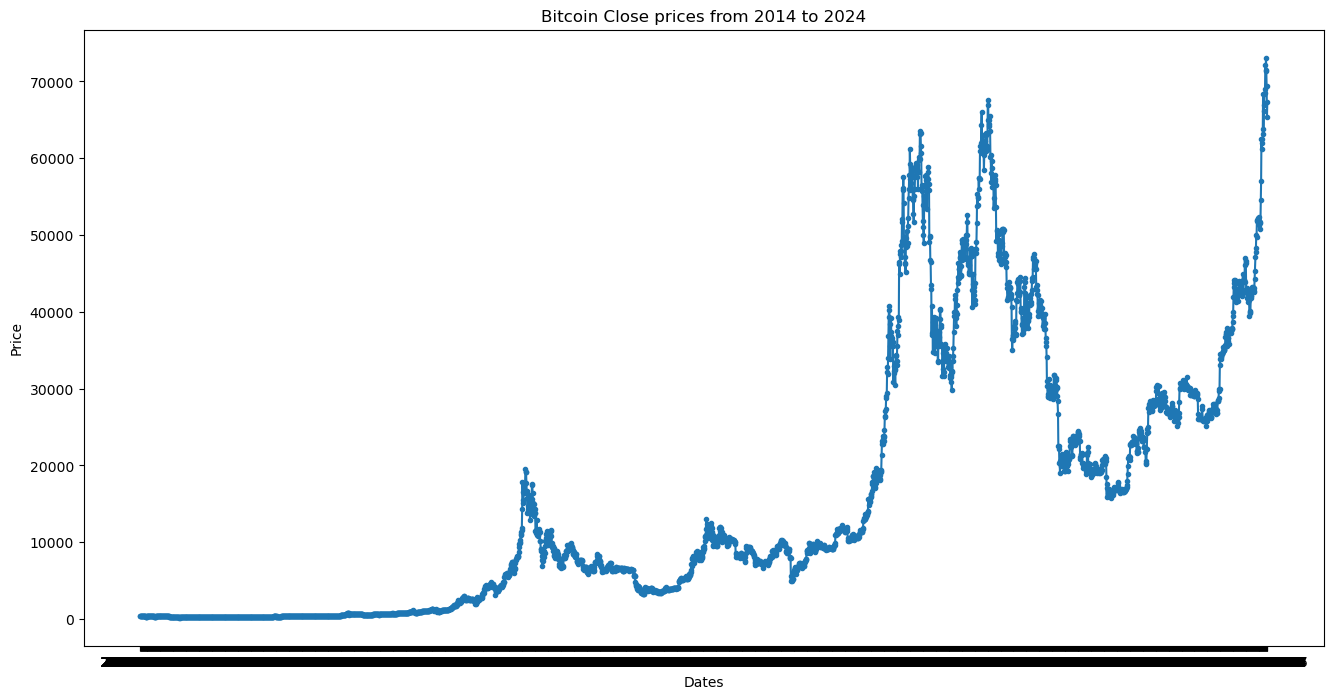

In [5]:
plt.figure(figsize = (16,8))
plt.title('Bitcoin Close prices from 2014 to 2024')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(data_close['Close'], ".-")
plt.show()

From the plot we can say that the data isn't stationary. This plot clearly shows the periods of rapid price increases and the subsequent corrections, highlighting the extreme volatility and the general upward trend in Bitcoin's value over time.

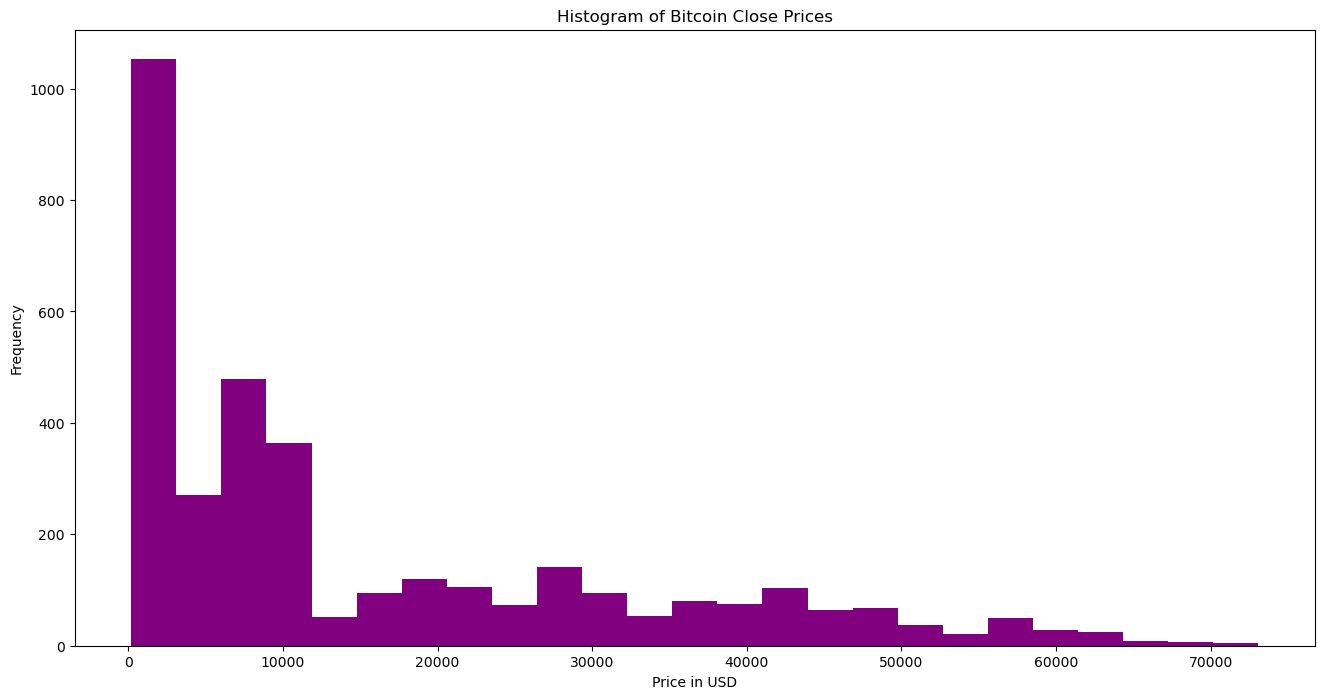

In [6]:
plt.figure(figsize=(16, 8))
plt.hist(data_close['Close'], bins=25, color='purple')
plt.title('Histogram of Bitcoin Close Prices')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

The Bitcoin price histogram shows that most days, Bitcoin's highest prices are less frequent, but sometimes they spike high. This pattern tells us that Bitcoin prices can change a lot and that very high prices are rare but do happen. The chart helps us see the most common price levels and how unpredictable Bitcoin prices can be.

In [7]:
# Creating year and month columns for seasonal plots
data_close['Date'] = pd.to_datetime(data_close['Date']) 
data_close.set_index('Date', inplace=True) 
data_close['Year'] = data_close.index.year
data_close['Month'] = data_close.index.month_name()

In [8]:
data_close

,Close,Year,Month
Date,,,
2014-09-17,457.334015,2014,September
2014-09-18,424.440002,2014,September
2014-09-19,394.795990,2014,September
2014-09-20,408.903992,2014,September
2014-09-21,398.821014,2014,September
...,...,...,...
2024-03-13,73083.500000,2024,March
2024-03-14,71396.593750,2024,March
2024-03-15,69403.773438,2024,March


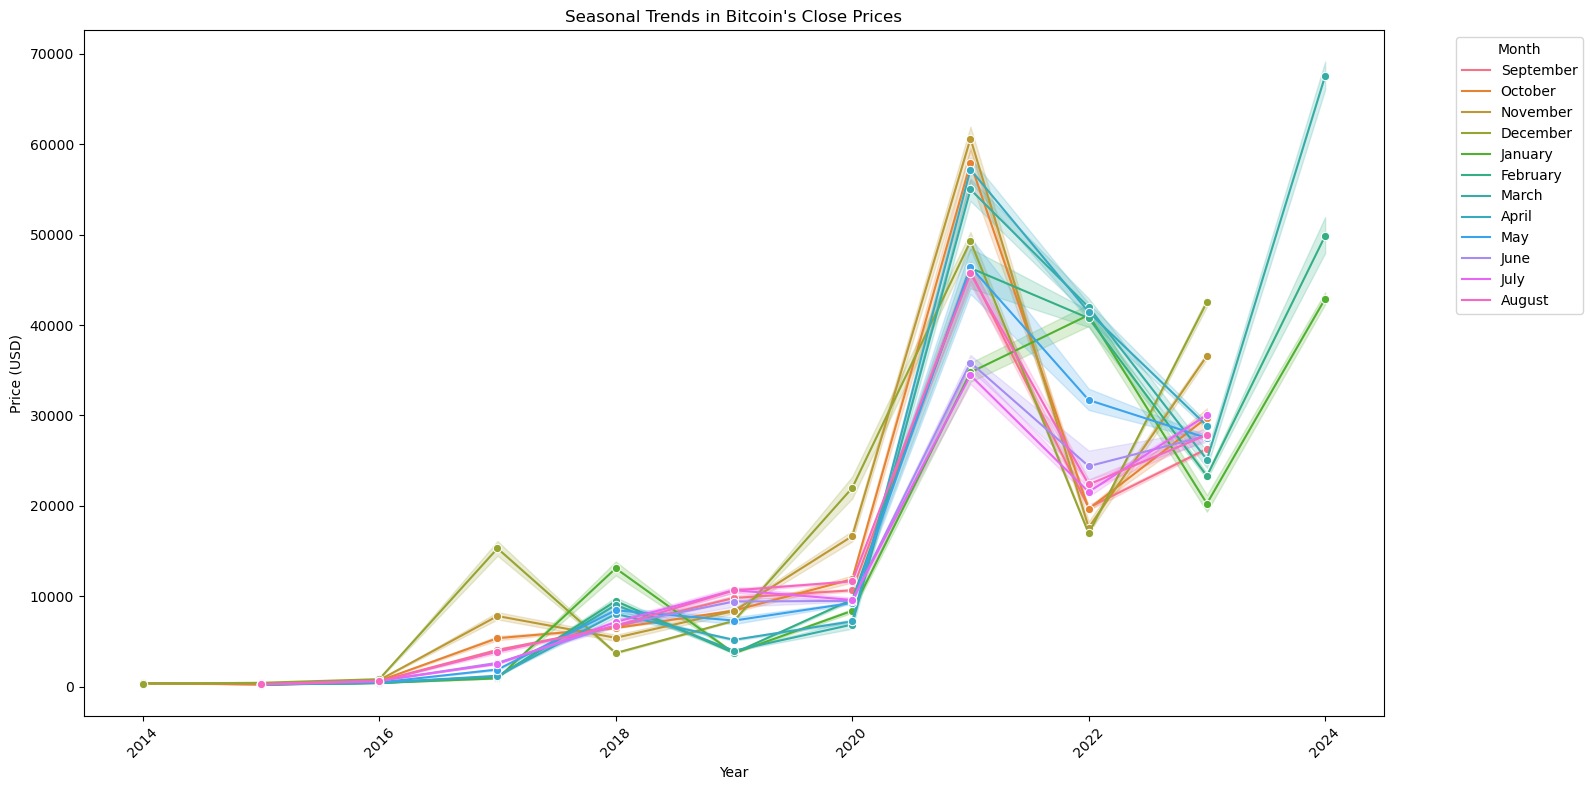

In [9]:
plt.figure(figsize=(16, 8))

# Using seaborn lineplot to create a line plot where each line represents a month
sns.lineplot(data_close, x=data_close['Year'], y=data_close['Close'], hue=data_close['Month'], marker='o')

plt.title('Seasonal Trends in Bitcoin\'s Close Prices')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Representation of averages of each month of each year from 2014 to 2024.

In [10]:
pivot = data_close.pivot_table(values='Close', index='Month', columns='Year', aggfunc='mean')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot = pivot.reindex(month_order)

Plot is a heatmap, which is a data visualization technique used to represent the magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving immediate visual cues to the reader about how the phenomenon is clustered or varies over space

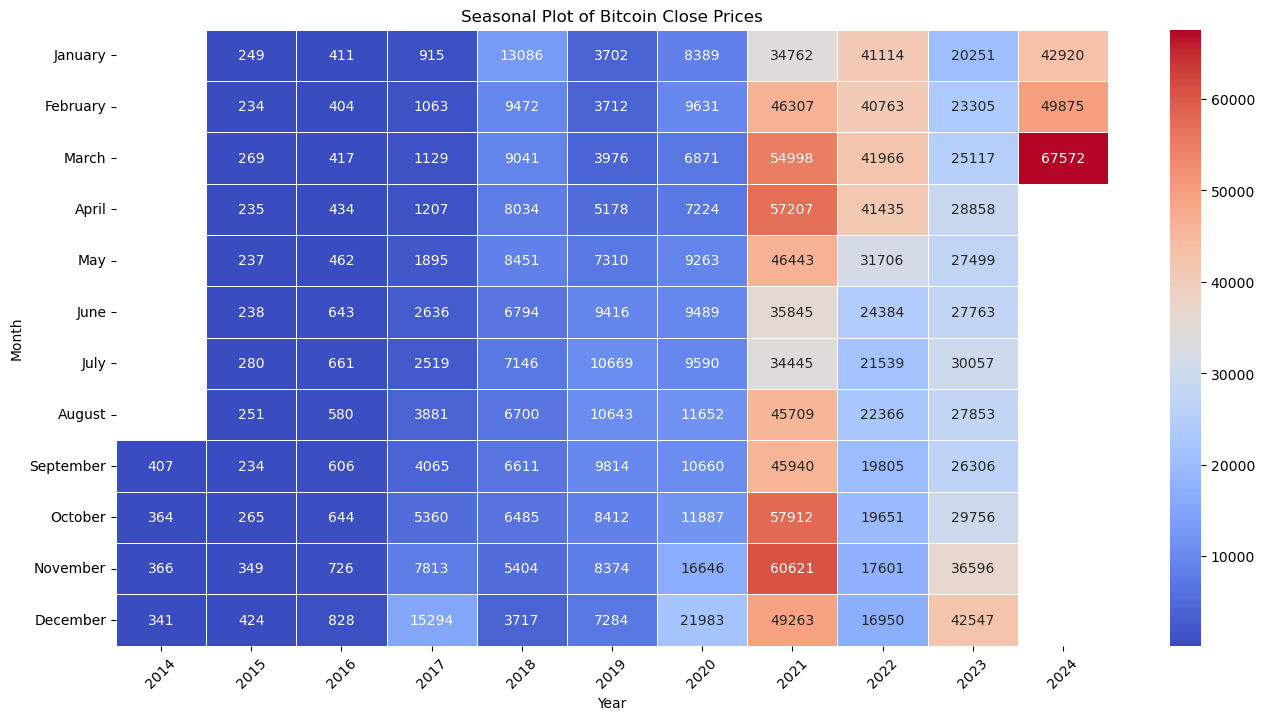

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Seasonal Plot of Bitcoin Close Prices')
plt.ylabel('Month')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

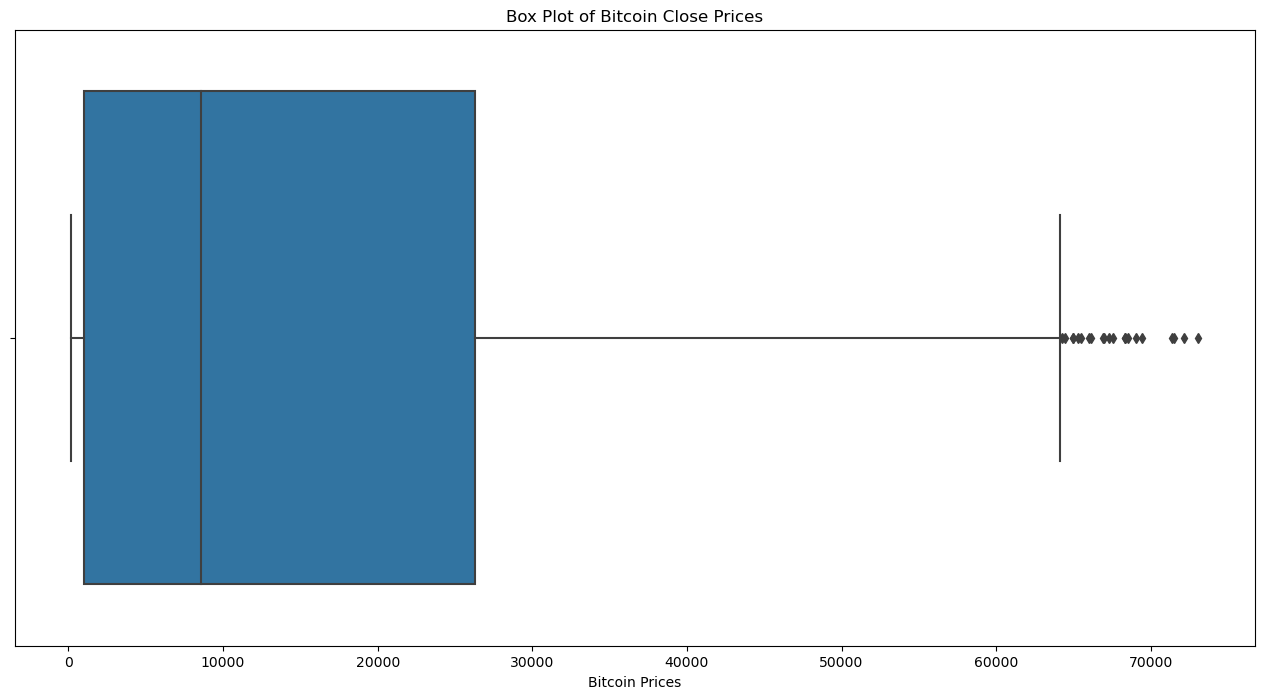

In [12]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=data_close['Close'])
plt.title('Box Plot of Bitcoin Close Prices')
plt.xlabel('Bitcoin Prices')
plt.show()

In [13]:
# Apply Z-score method for outlier detection
data_close['Z_score'] = zscore(data_close['Close'])
outliers = data_close[data_close['Z_score'].abs() > 3]
outliers

,Close,Year,Month,Z_score
Date,,,,
2021-11-08,67566.828125,2021,November,3.078845
2021-11-09,66971.828125,2021,November,3.043735
2024-03-04,68330.414063,2024,March,3.123903
2024-03-07,66925.484375,2024,March,3.041000
2024-03-08,68300.093750,2024,March,3.122114
2024-03-09,68498.882813,2024,March,3.133844
2024-03-10,69019.789063,2024,March,3.164582
2024-03-11,72123.906250,2024,March,3.347752
2024-03-12,71481.289063,2024,March,3.309832


The significant Bitcoin price peaks observed on various dates, with notable concentrations in March 2024. Z-scores exceeding 3 standard deviations indicate potential outliers, suggesting significant deviations from the mean.

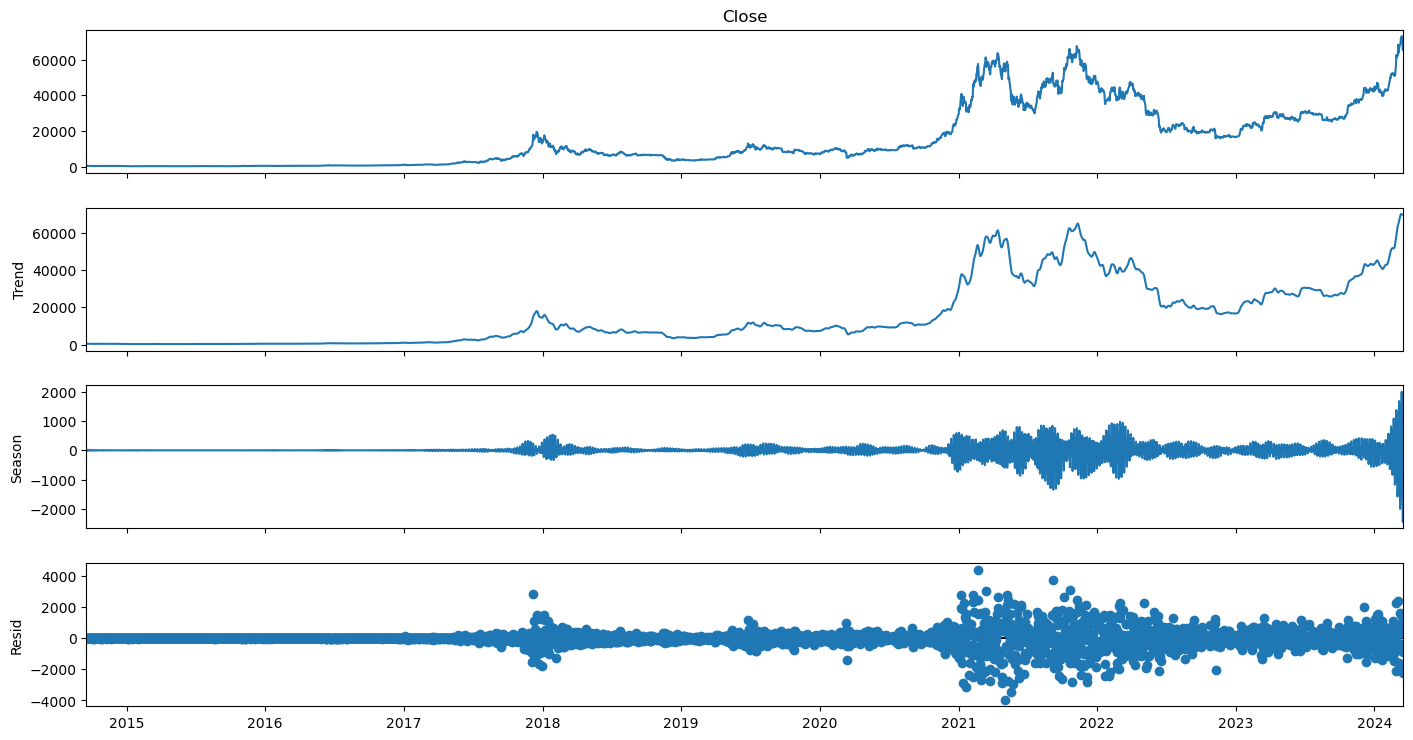

In [14]:
decomposition = STL(data_close['Close'], seasonal=13) 
result = decomposition.fit()
result.plot()
plt.gcf().set_size_inches(16, 8)
plt.show()

From this plot we can assume that there is a trend, no seasonality and some noise in residuals.

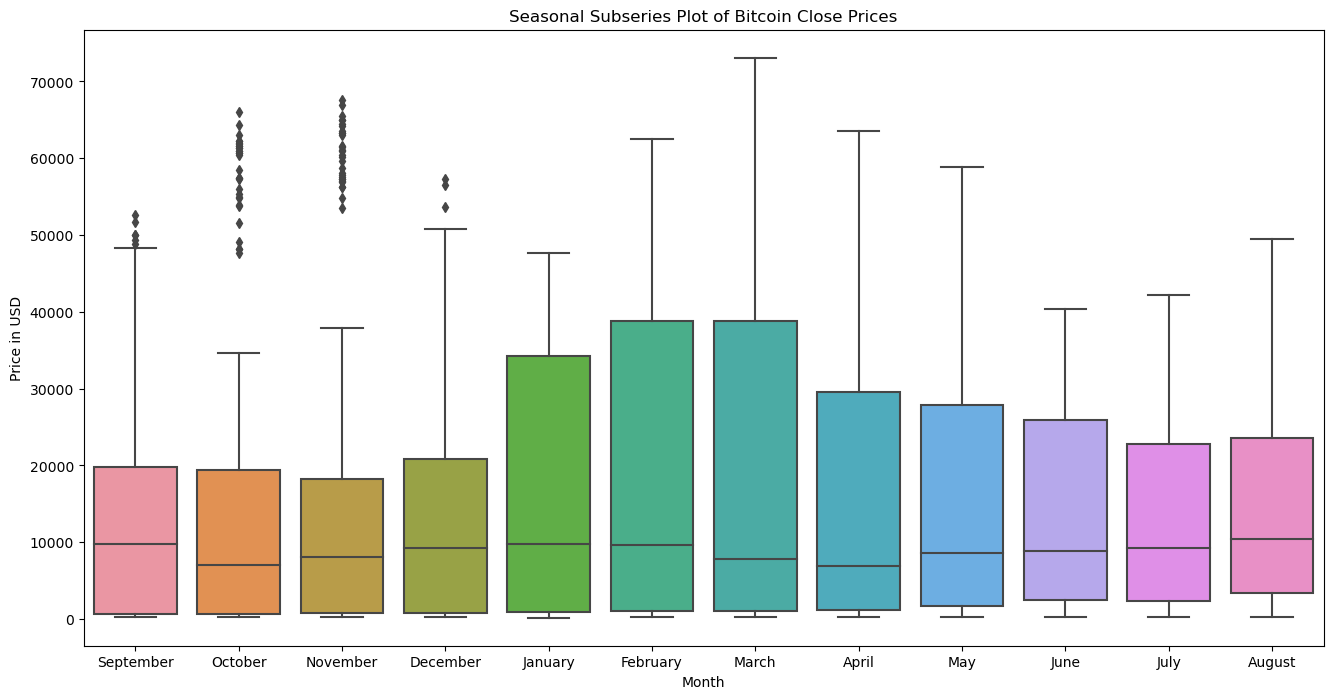

In [15]:
sns.set_palette("husl")
plt.figure(figsize=(16, 8))
sns.boxplot(x='Month', y='Close', data=data_close)
plt.title('Seasonal Subseries Plot of Bitcoin Close Prices')
plt.xlabel('Month')
plt.ylabel('Price in USD')
plt.show()

This seasonal subseries plot of Bitcoin's highest prices displays how prices vary between different months. It helps identify any consistent patterns or trends in Bitcoin prices across the year, aiding in the analysis of potential seasonality in price behavior.


In [16]:
decomposition = seasonal_decompose(data_close['Close'], model='additive', period=30)

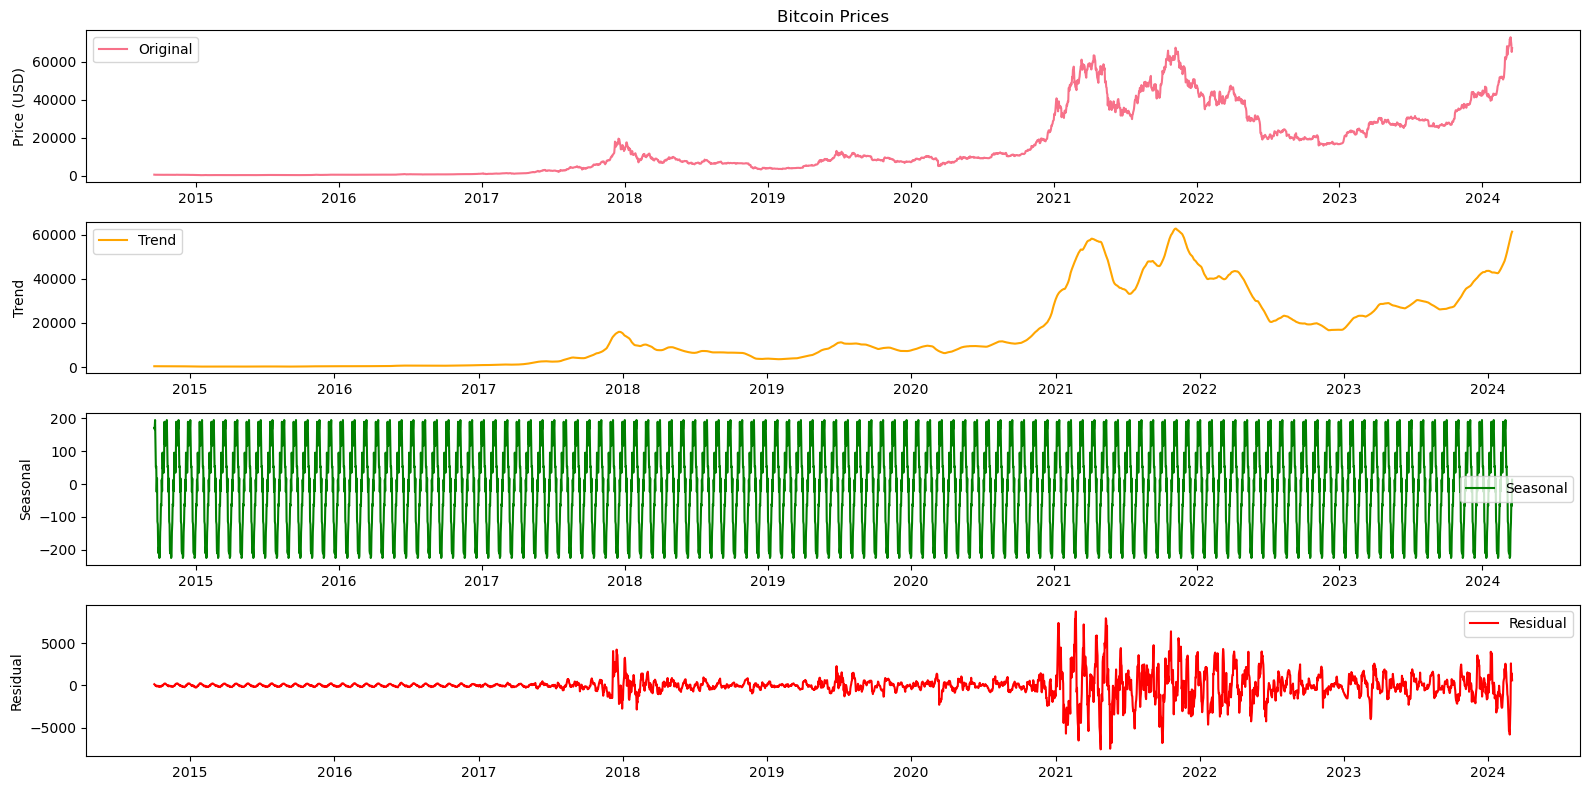

In [17]:
# Plot the original time series
plt.figure(figsize=(16, 8))
plt.subplot(4, 1, 1)
plt.plot(data_close.index, data_close['Close'], label='Original')
plt.title('Bitcoin Prices')
plt.ylabel('Price (USD)')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(data_close.index, decomposition.trend, label='Trend', color='orange')
plt.ylabel('Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(data_close.index, decomposition.seasonal, label='Seasonal', color='green')
plt.ylabel('Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(data_close.index, decomposition.resid, label='Residual', color='red')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()

We applied seasonal decomposition to pinpoint and measure the recurring seasonal patterns in our data, allowing for clearer analysis and improved forecasting by acknowledging these predictable variations. As we can see from our plots there is a trend, seasonality also. For more specific analyses we will test another tests.

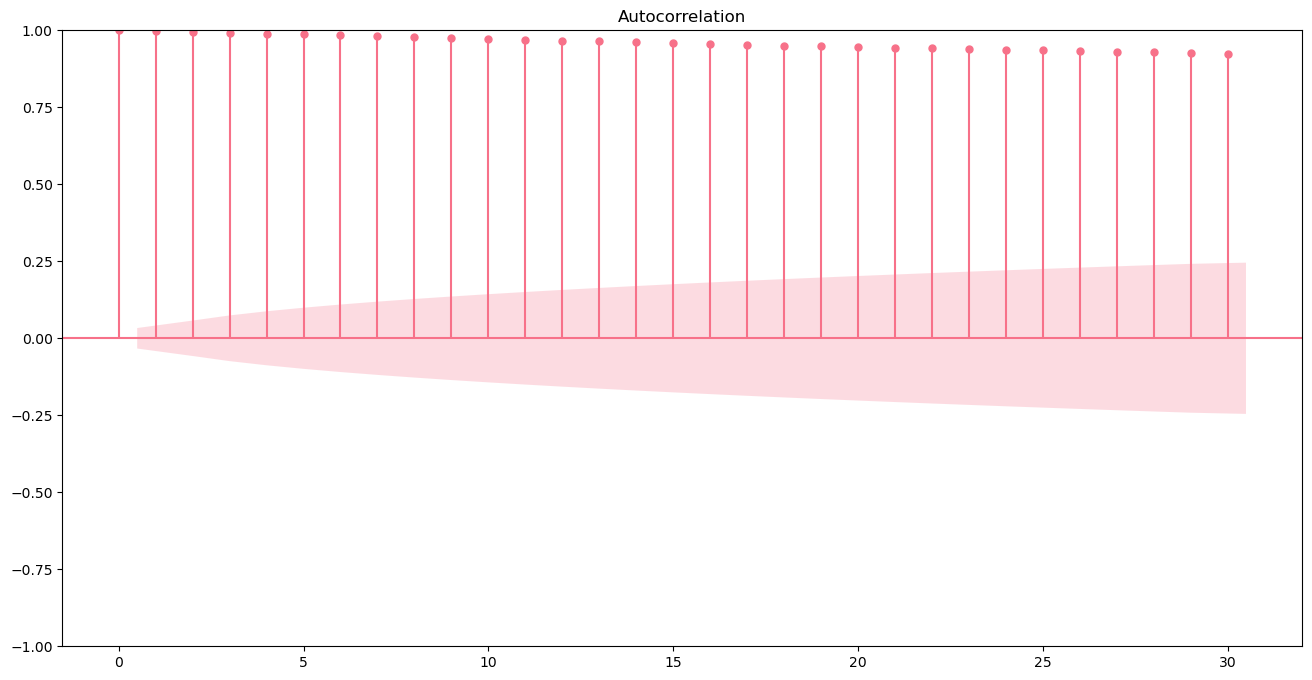

In [18]:
plot_acf(data_close['Close'], lags=30)
plt.gcf().set_size_inches(16, 8)
plt.show()

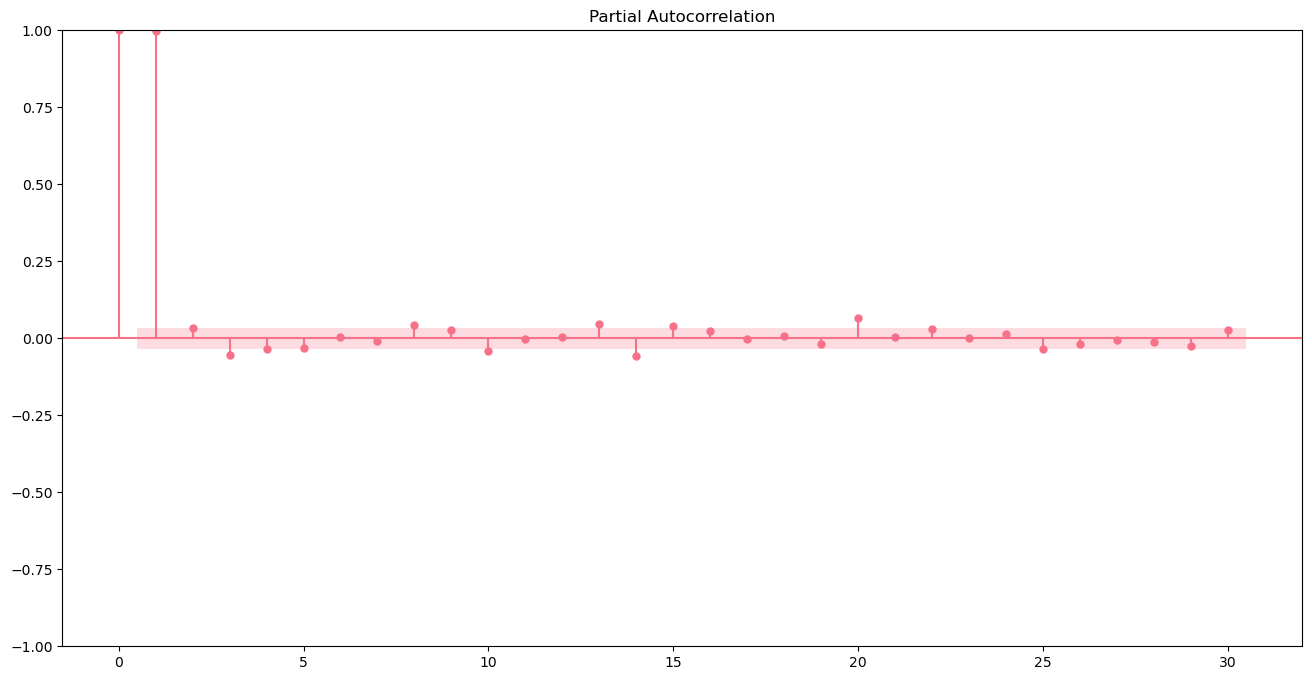

In [19]:
plot_pacf(data_close['Close'], lags=30)
plt.gcf().set_size_inches(16, 8)
plt.show()

Why lags=30? because in average a month has 30 days. By limiting the number of lags to 30, we focus on detecting potential seasonal patterns within a reasonable time frame.
By plotting the ACF and PACF, we can analyze the temporal dependence structure of the Bitcoin price time series and determine the appropriate lag values for modeling and forecasting purposes. The ACF plot shows that Bitcoin's price has a strong, consistent pattern over time, likely indicating a trend or seasonal pattern.The PACF plot shows a significant spike at the first lag and virtually no significant correlation for subsequent lags. This indicates that the immediate past value has a strong influence on the current value, but this influence doesn't persist beyond the first lag.